## Notebook to create plots with logged data

In [1]:
import os
import plotting 
import pandas as pd

<Figure size 7200x4800 with 0 Axes>

In [2]:
files = ["/home/niko/Info/cablab/runs/ma-dqn/130/logs1.csv", "/home/niko/Info/cablab/runs/ma-dqn/144/logs1.csv" ,"/home/niko/Info/cablab/runs/ma-dqn/141/logs1.csv"]

output_path = "/home/niko/Desktop/"

ids = ["avg_waiting_time"]

labels = ["MA-DQN no assignment", "MA-DQN random assignment","MA-DQN optimal assignment"]

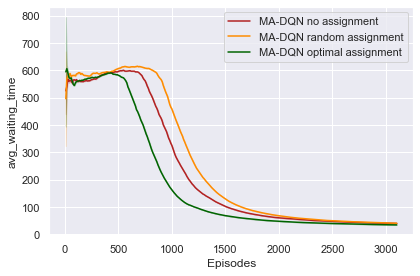

In [6]:
dfs = []

def plot_from_files():     
    for i,file in enumerate(files): 
        df = pd.DataFrame()
        df = pd.read_csv(file)
        dfs.append(df)
    plotting.plot_mult_agent(dfs, ids, output_path,labels)

plot_from_files()

In [30]:
folder_path = '/home/niko/Info/cablab/runs/ma-dqn/58/'
file_names = ['logs1.csv', 'logs2.csv']

dfs = []

for file_name in file_names: 
    file_path = os.path.join(folder_path, file_name)
    df = pd.DataFrame()
    df = pd.read_csv(file_path)
    dfs.append(df)

In [31]:
values_to_add = ['illegal_pick_ups','illegal_moves', 'n_passengers', 'rewards', 'mean_pick_up_path', 'mean_drop_off_path', 'do_nothing_arr' ,'do_nothing_opt_arr','do_nothing_sub_arr']

for value in values_to_add: 
    dfs[0][value] = dfs[0][value] + dfs[1][value]

summed_df = dfs[0]

file_name = os.path.join(folder_path, "summed_logs.csv")
summed_df.to_csv(file_name)

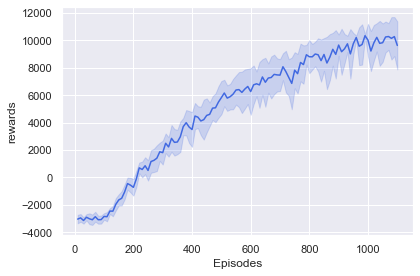

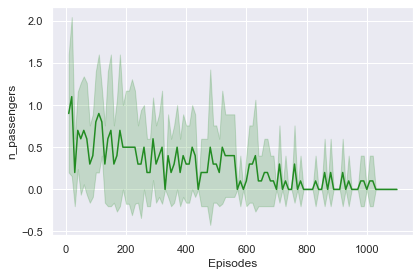

In [32]:
output_path = os.path.join(folder_path, 'summed')

if not os.path.exists(output_path):
        os.makedirs(output_path)

plotting.plot_values(summed_df, ['rewards'], output_path)
plotting.plot_values(summed_df, ['n_passengers'], output_path)